<a href="https://colab.research.google.com/github/Mamatha22mh1a4249/DeepLearning-Lab/blob/main/Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize

In [2]:
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 488.5871 - mae: 19.9661 - val_loss: 412.4561 - val_mae: 18.2666
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 356.2255 - mae: 16.6107 - val_loss: 276.6468 - val_mae: 14.5210
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 238.7078 - mae: 13.0797 - val_loss: 150.6518 - val_mae: 10.4748
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 110.8227 - mae: 8.3642 - val_loss: 86.0421 - val_mae: 7.4320
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.2420 - mae: 6.7305 - val_loss: 64.4460 - val_mae: 6.1842
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.3410 - mae: 5.3574 - val_loss: 47.2811 - val_mae: 5.3485
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.6437 - mae: 4.2194 - val_loss: 38.1929 - val_mae: 4.8505
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.4160 - mae: 3.8042 - val_loss: 32.7840 - val_mae: 4.5304
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━

In [8]:
test_loss=model.evaluate(X_test,y_test)
print('Test Loss:',test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4587 - mae: 2.3914
Test Loss: [17.082021713256836, 2.5867905616760254]


In [9]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mean Absolute Error: 2.5867906645232557


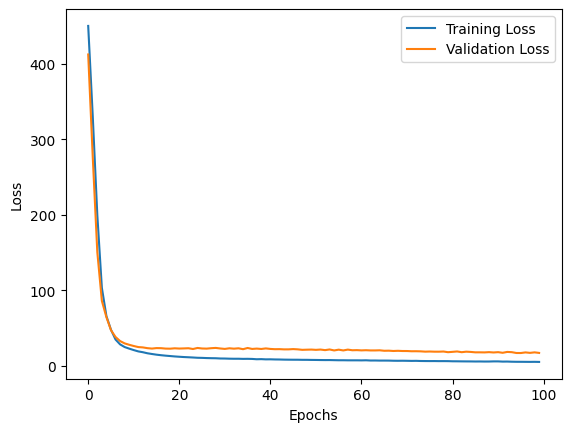

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
